# Read margrietroute file and restructure the data into smaller gpx file 
**Sumana Bhlapibul : June 27, 2021**

In [1]:
import re

GPXfile='margrietroute.gpx'
data = open(GPXfile).read()

In [2]:
## extract header, footer and body from xml file

header = '<?xml version="1.0" encoding="UTF-8" standalone="no" ?>        <gpx xmlns="http://www.topografix.com/GPX/1/1" creator="Geovative Solutions GeoTours" version="1.1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd">\n      <metadata>\n        <link href="http://www.margrietroute.nl">\n          <text>Margriet Route</text>\n        </link>\n      </metadata>\n'
footer = '\n </gpx>'

body = data.replace(header, "")
body = body.replace(footer, "")
body = body.strip()

In [3]:
# extract waypoints data using regular expression
waypoints = re.findall(r'<wpt.{10,30}></wpt>',body)

In [4]:
## Write program to split data into smaller size and save file

# here we define variable - we want to be able to change number of file to make sure that each file is small enough to 
# upload into our navigation app

lwp = len(waypoints)
nfiles = 30
nlines = int(lwp/nfiles)


wp=1
for i in range (1,nfiles+1):
    filename = "Denmark_"+str(i)+".gpx"
    #print(filename)
    output=""
    for j in range(nlines):
        if wp < lwp :
            output = output+waypoints[wp]
        wp=wp+1
    file = header + output + footer
    with open(filename, "w") as text_file:
        text_file.write(file)

## This section we examine the route using plot and map

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# extract lat and log 
lat = np.array([float(i) for i in re.findall(r'lat="([^"]+)',data)])
lon =  np.array([float(i) for i in re.findall(r'lon="([^"]+)',data)]) 

In [7]:
# put data in pandas DataFrame
route = pd.DataFrame(columns = ["lat", "lon"])
route["lat"] = lat
route["lon"]=lon

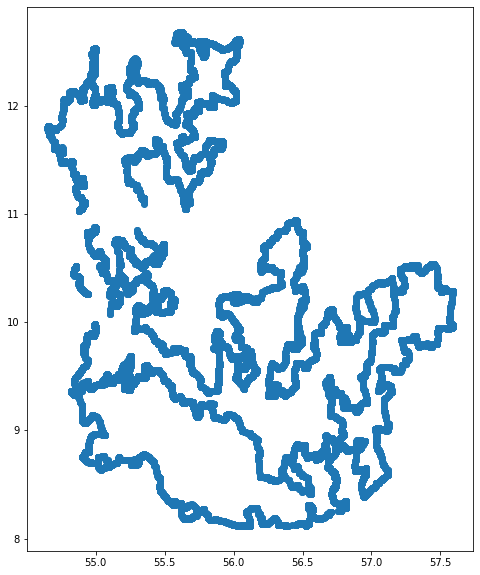

In [8]:
# use matplotlib to visualize data
plt.figure(figsize = (8,10))
plt.subplot() 
plt.scatter(route['lat'], route["lon"]);

## This section we plot (part of the route) on Denmark map using folium

In [12]:
## slice data -> part of the route into variable and use avarage lon and lat as map center 
import folium

X = route.loc[ 0:2000, 'lat']
Y = route.loc[0:2000, "lon"]
Xo = round(X.mean(),4)
Yo = round(Y.mean(),4)


(56.1073, 8.8799)

In [13]:
# plot map with route
map_Denmark = folium.Map(location= [Xo,Yo],zoom_start=8)
for lat,lon in zip(X, Y):
    folium.CircleMarker(
    [lat,lon],
    radius=1,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_Denmark)
map_Denmark